# Hierarchical clustering (Agglomerative clustering)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
# dropping ID column because it is of no use for the analysis
df.drop(columns=['ID#', 'Award?'], inplace=True)

In [4]:
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0               1                  0                0               7000  
1               2                  0                0               6968  
2               4                  0                0               7034  
3               1                  0                0               6952  
4              26               2077                4               6935  
...           ...                ...              ...                ...  
3994            4                200                1               1403  
3995            5                  0                0               1395  
3996            8                  0                0               1402  
3997            1                500                1               1401  
3998            0                  0                0               1398  

[3999 rows x 10 columns]

<Axes: xlabel='Bonus_miles', ylabel='Balance'>

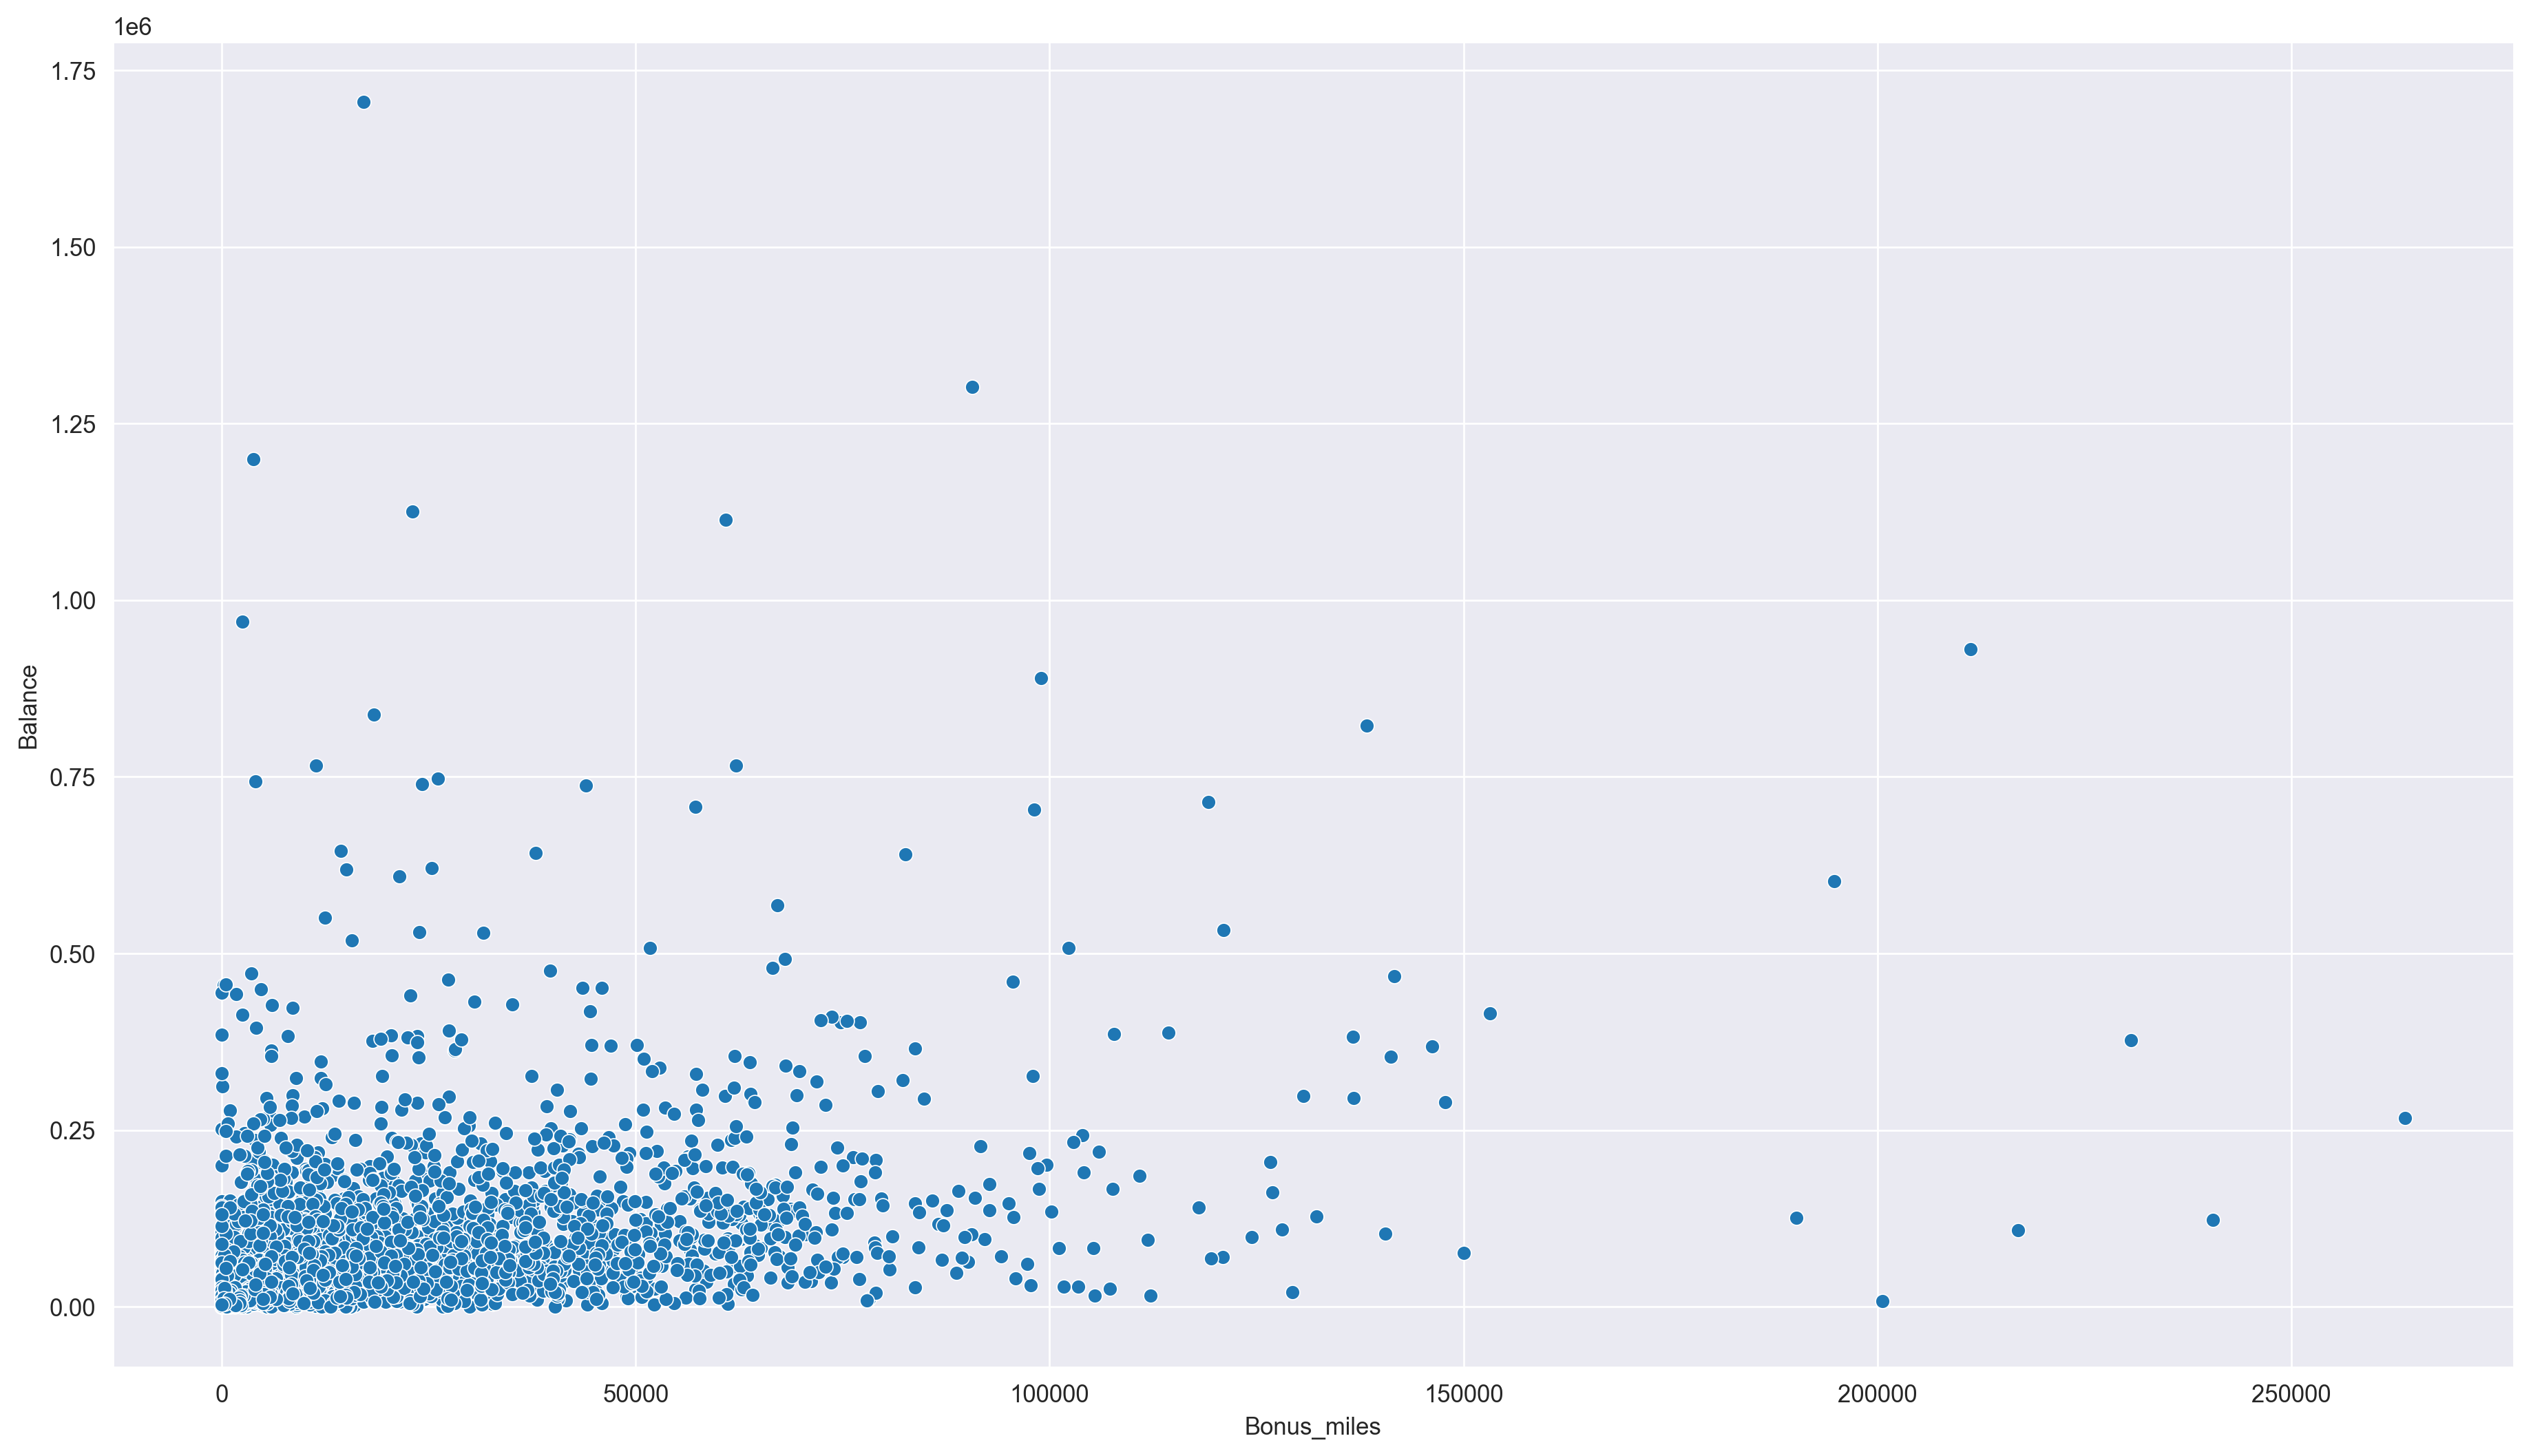

In [5]:
# data is present 11 dimensions so I cannot visualize it but just to get an idea about the distribution of data plotted graphs between two columns data
sns.scatterplot(data=df, x='Bonus_miles', y='Balance' )

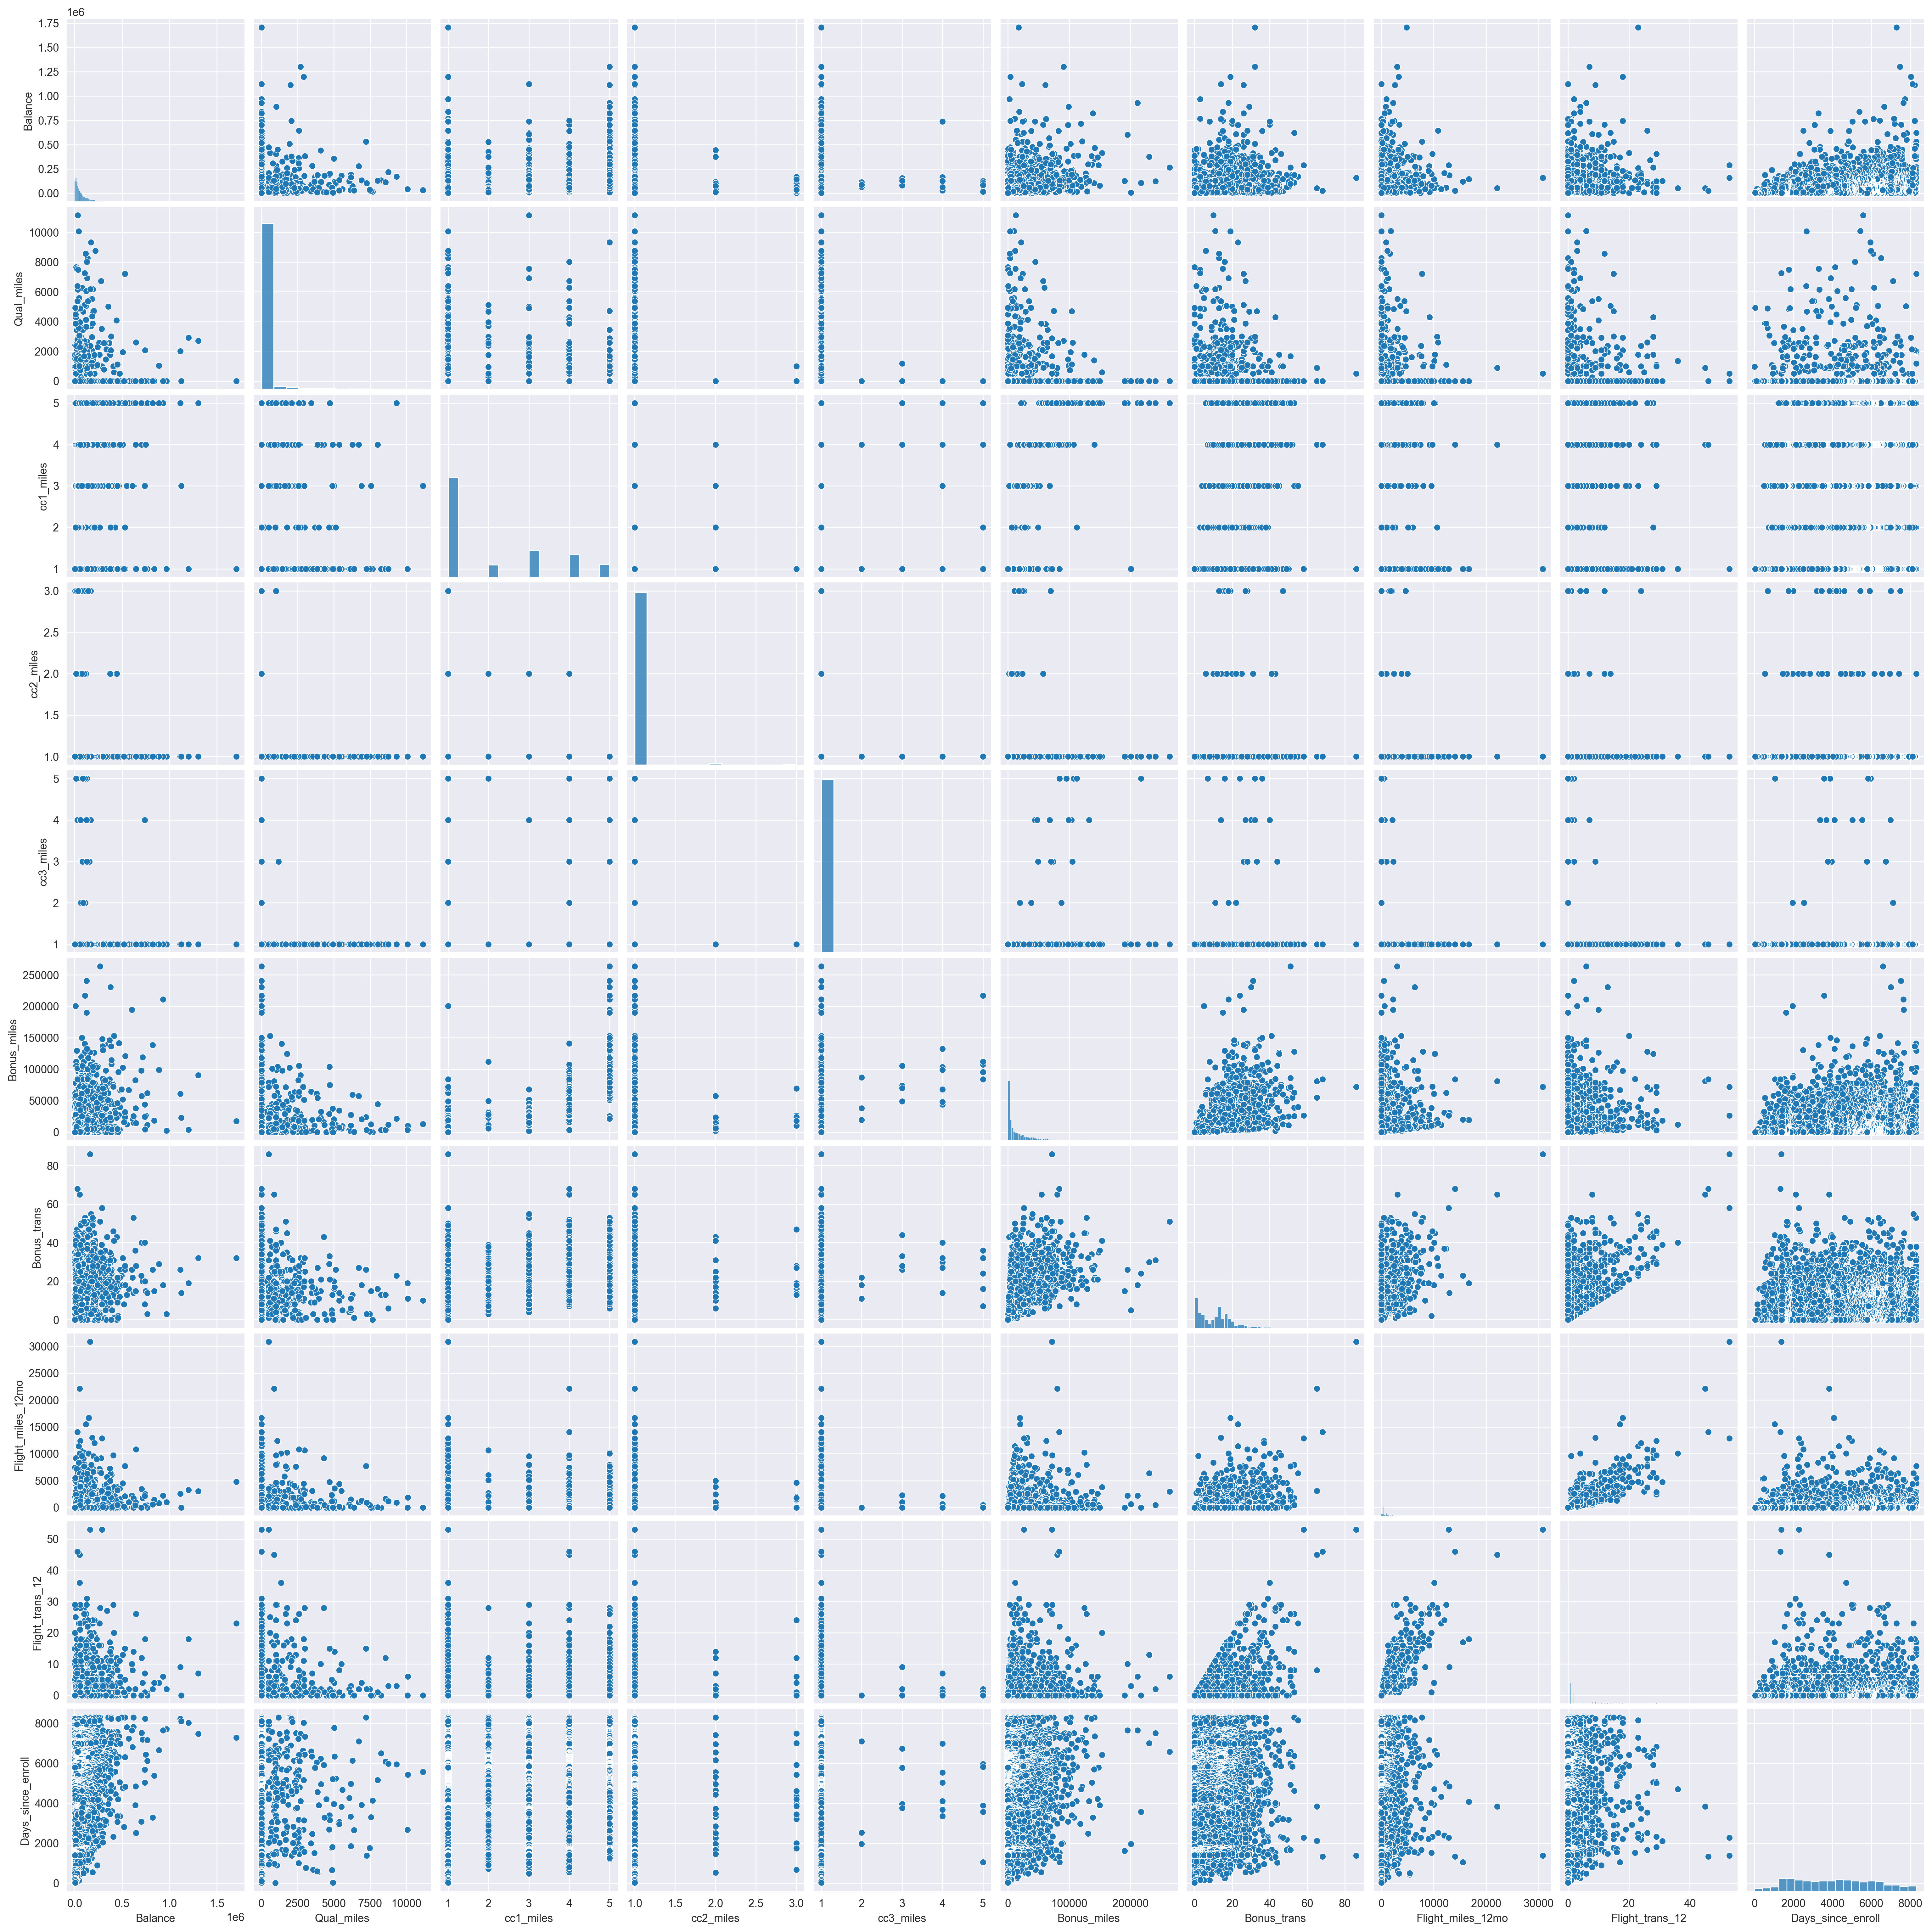

In [6]:
sns.pairplot(df)

### descriptive analysis

In [7]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll  
count         3999.00000  
mean          4118.55939  
std           2065.13454  
min              2.00000  
25%           2330.00000  
50%           4096.00000  
75%           5790.50000  
max           8296.00000

In [8]:
# there is no missing values
# outliers can be persent in Bonus_miles, Qual_miles, Flight_miles_12mo columns

<Axes: >

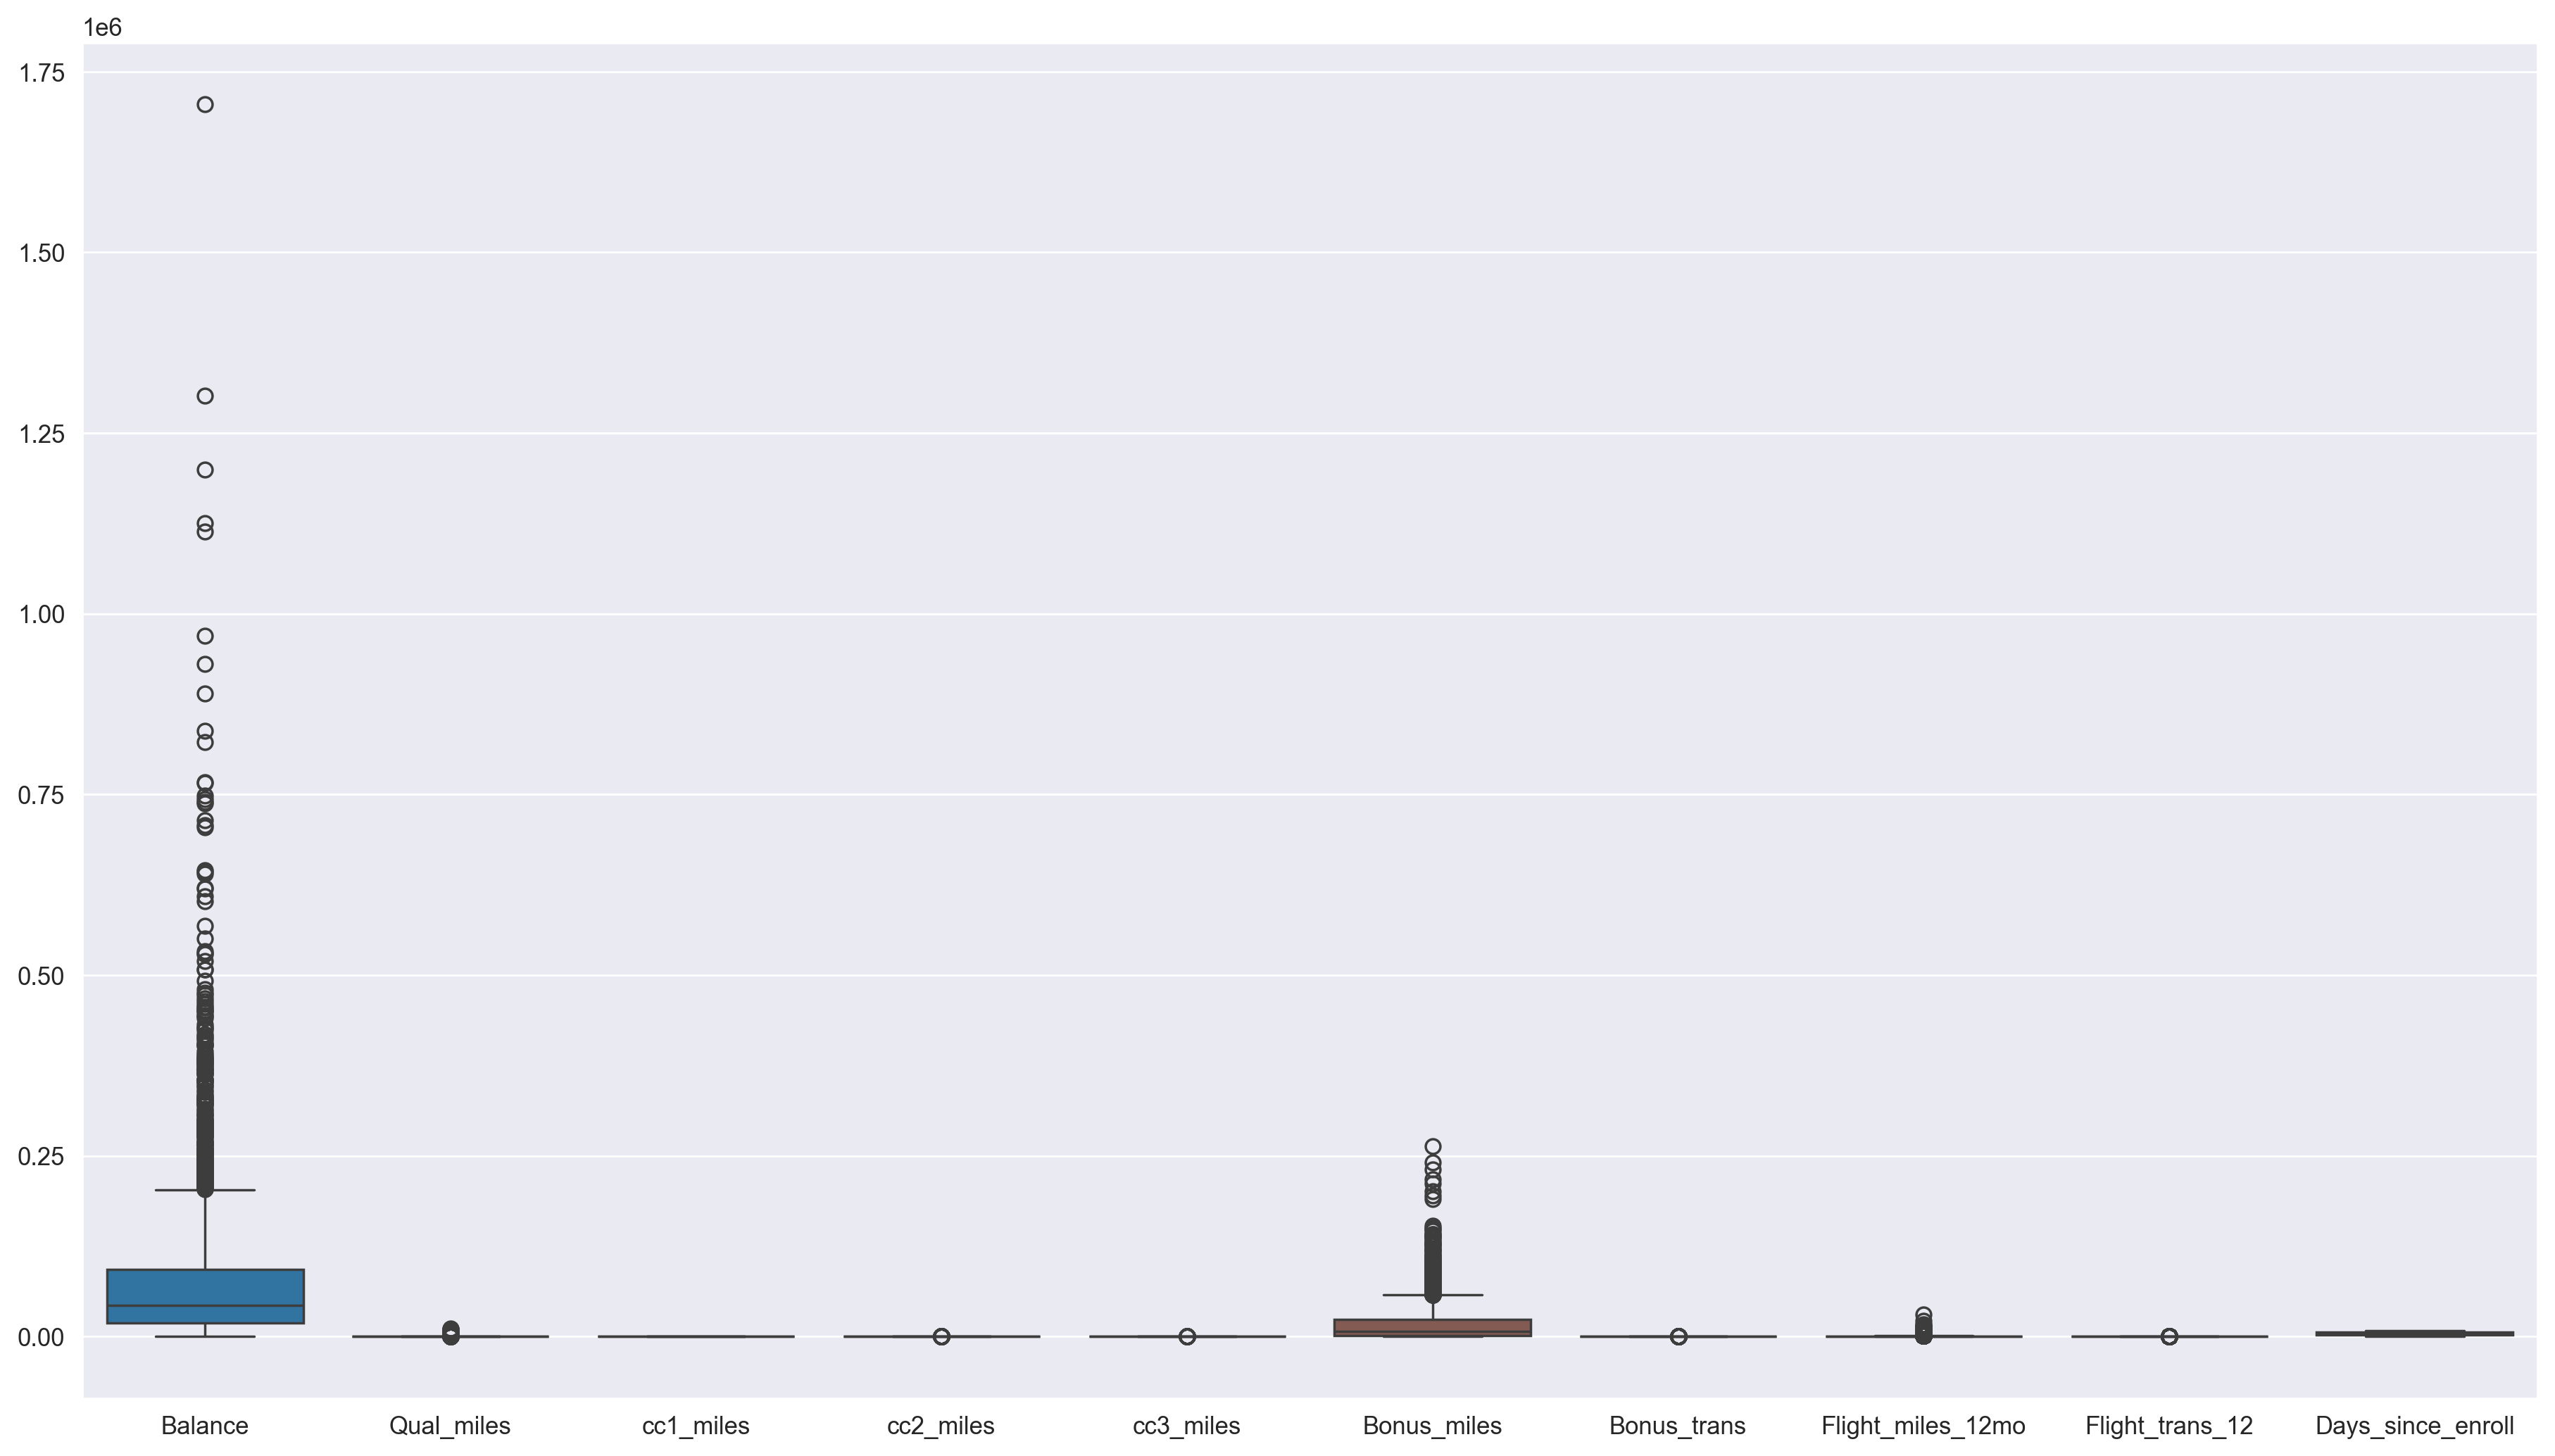

In [9]:
# boxplot for outliers detection
sns.boxplot(df)

 most of the columns are having outliers so I need to deal with the outliers. 
 Because Hierarchical clustering perfoms very bad whern there is a presence of outliers in the dataset

In [10]:
df.head(5)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0            1                  0                0               7000  
1            2                  0                0               6968  
2            4                  0                0               7034  
3            1                  0                0               6952  
4           26               2077                4               6935

In [11]:
# checking total number of unique values present in each column
df.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
dtype: int64

In [12]:
# checking datatype of columns
df.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
dtype: object

In [13]:
# checking for null values
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [14]:
# checking for duplicated values
df.duplicated().sum()

1

In [15]:
# there is one duplicated datapoint is persent in the data
# I need to drop that duplicated row it is not giving any new information

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

0

duplicated record removed

### Capping Outliers

defining fuction for capping outliers

In [18]:
def capping(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3 - q1
        upper = q3 + (1.5 * IQR)
        lower = q1 - (1.5 * IQR)
        data[col] = np.where(data[col] > upper, upper,
                             np.where(data[col] < lower, lower, data[col]))

In [19]:
# calling the fuction and capping the outliers
capping(df, df.columns)

<Axes: >

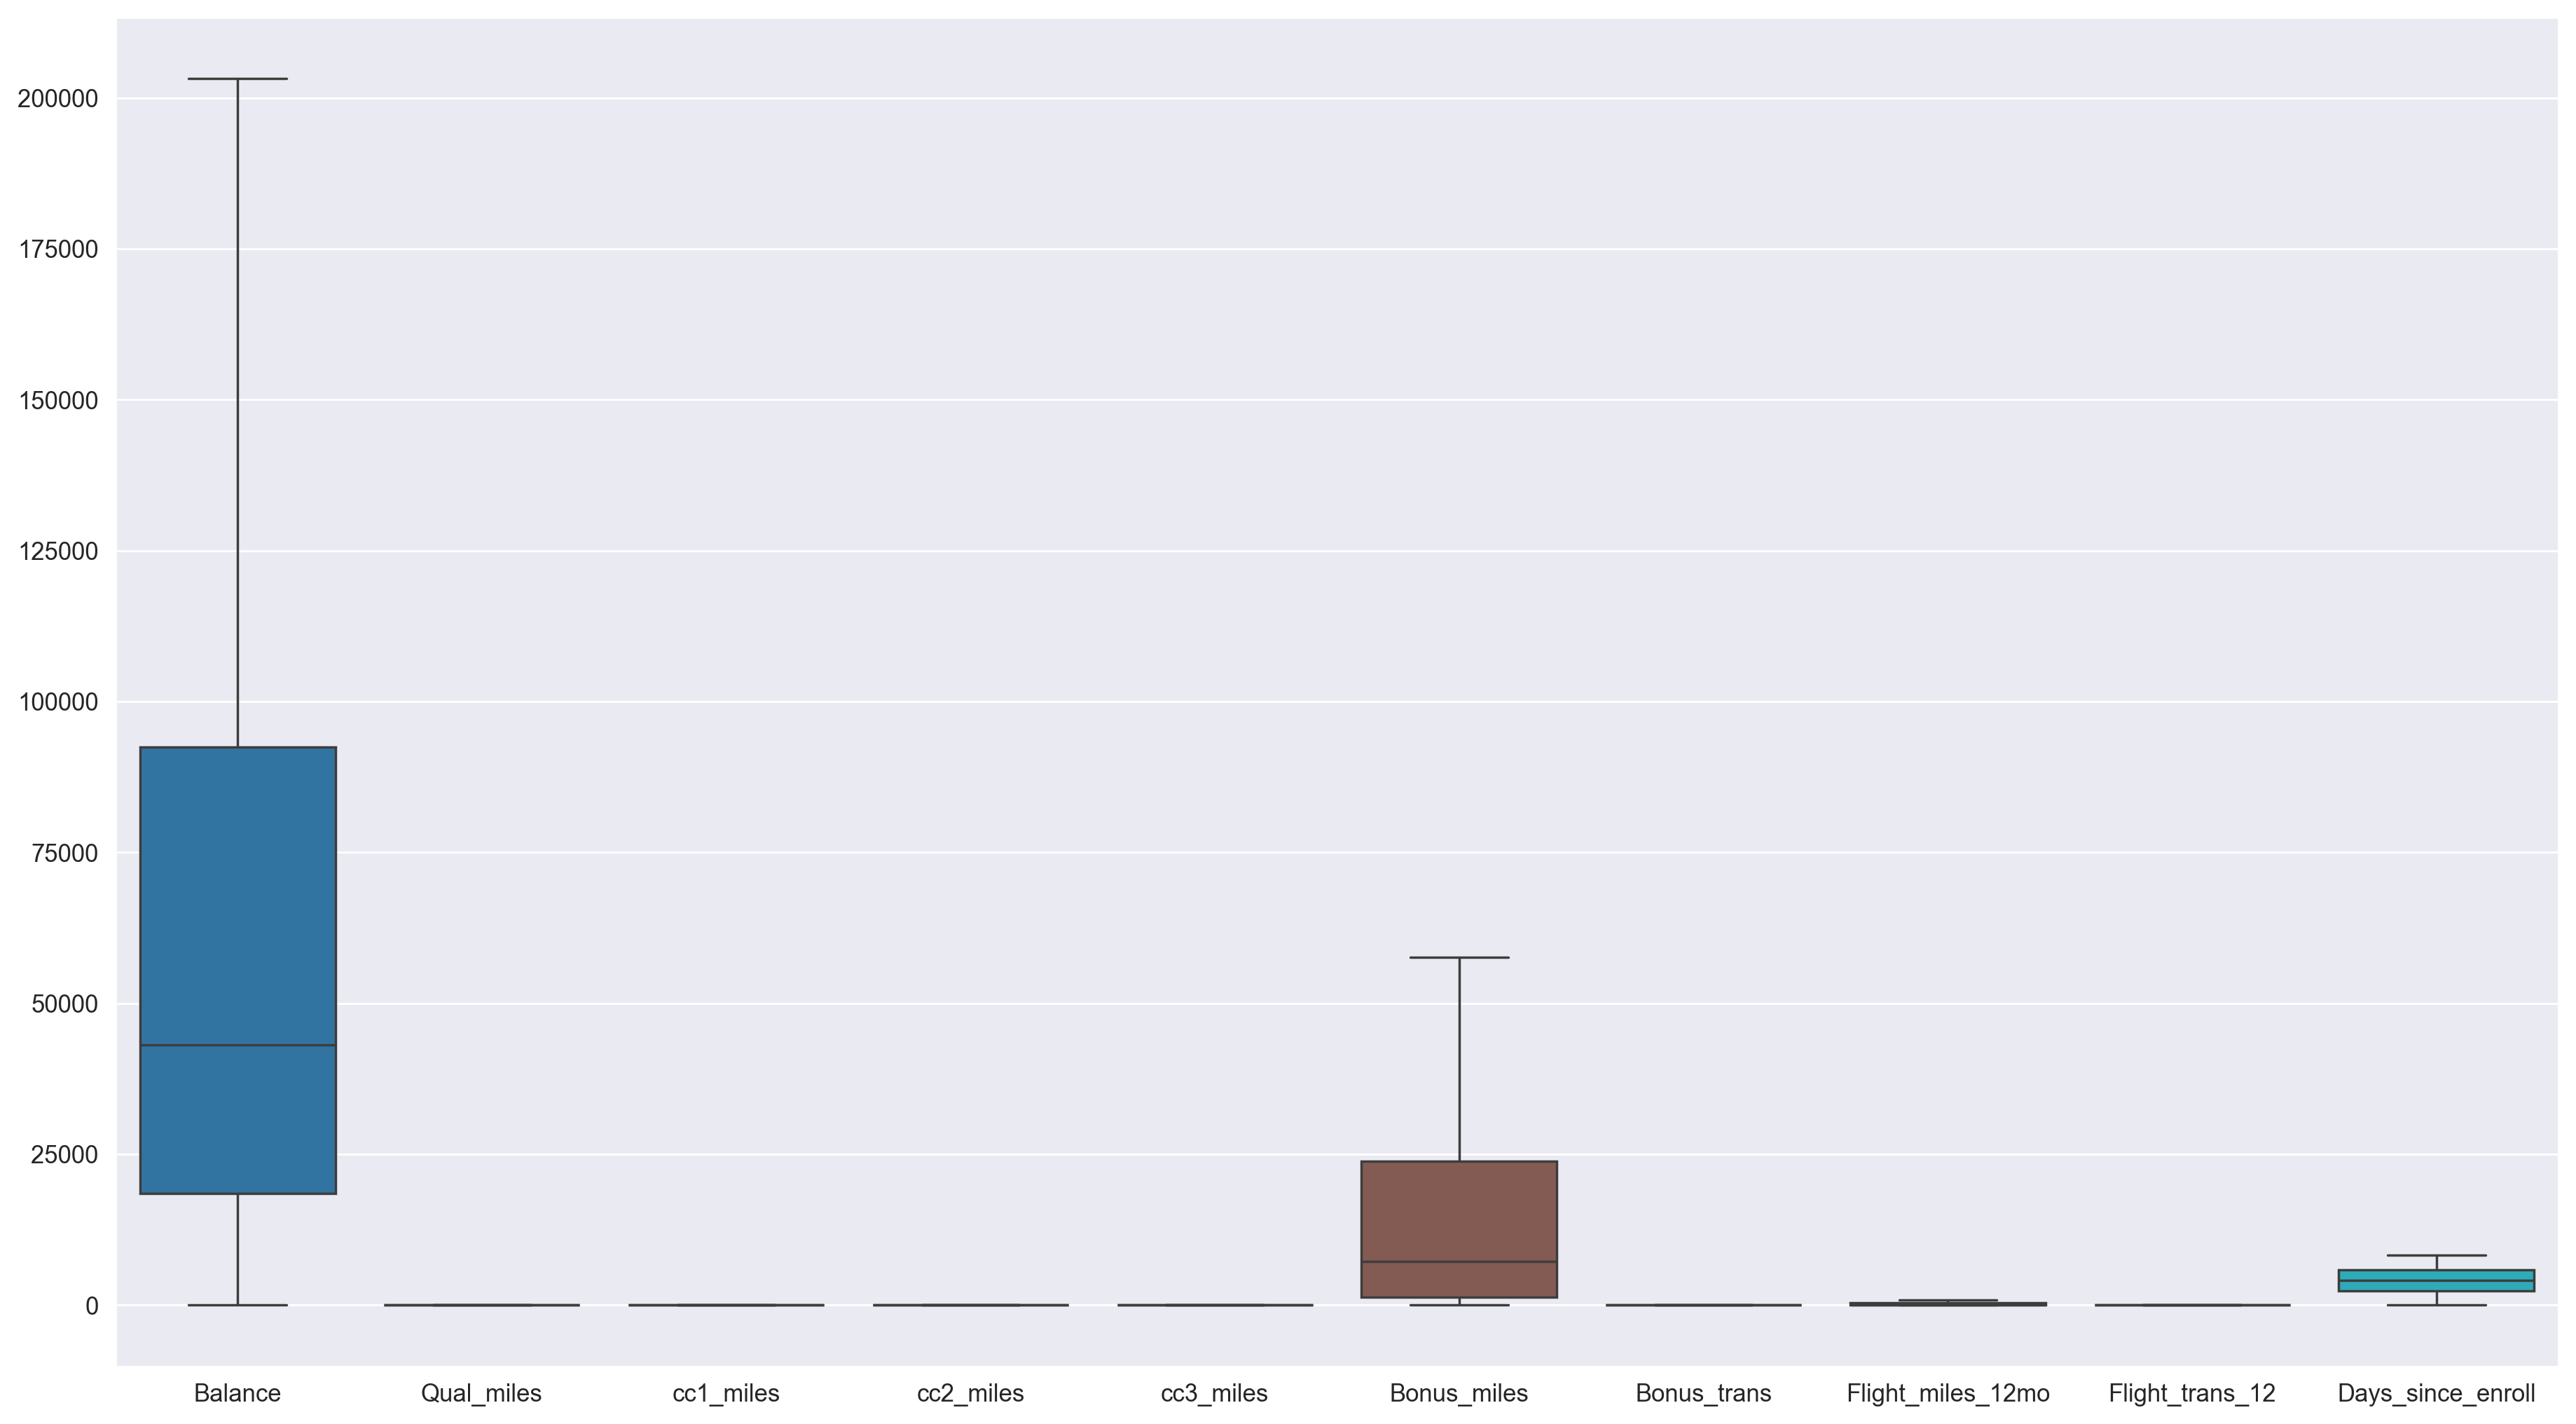

In [20]:
# checking for outliers
sns.boxplot(df)

In [21]:
# no outliers are present in the dataset right now

# Feature Engineering

In [22]:
# according to the data dictionary provided me 
# these three columns are not important so I dropped because these were causing curse of dimensionality

df.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles'], inplace=True)

# DATA TRANSFORMATION

## Feature Scalling

feature scalling is very important because this algorithm involves distance calculations

In [23]:
# standardization

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-0.60754076,  0.        , -0.84317887, ..., -0.60372299,
        -0.62625242,  1.39523468],
       [-0.75923491,  0.        , -0.84091083, ..., -0.60372299,
        -0.62625242,  1.37973643],
       [-0.38234339,  0.        , -0.62472782, ..., -0.60372299,
        -0.62625242,  1.41170157],
       ...,
       [ 0.1672773 ,  0.        ,  0.55487466, ..., -0.60372299,
        -0.62625242, -1.31599028],
       [-0.15145258,  0.        , -0.82514518, ...,  1.08275129,
         0.43219492, -1.3164746 ],
       [-1.03586068,  0.        , -0.85280422, ..., -0.60372299,
        -0.62625242, -1.31792757]])

In [26]:
# Just for my own undrestanding converted to dataframe but algorithm don't care about it

pd.DataFrame(x, columns=df.columns)

Balance  Qual_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0    -0.607541         0.0    -0.843179    -1.149253          -0.603723   
1    -0.759235         0.0    -0.840911    -1.039523          -0.603723   
2    -0.382343         0.0    -0.624728    -0.820064          -0.603723   
3    -0.835397         0.0    -0.825145    -1.149253          -0.603723   
4     0.579028         0.0     1.542468     1.593991           2.039825   
...        ...         ...          ...          ...                ...   
3993 -0.772326         0.0    -0.381218    -0.820064           0.070867   
3994  0.010248         0.0    -0.798537    -0.710334          -0.603723   
3995  0.167277         0.0     0.554875    -0.381145          -0.603723   
3996 -0.151453         0.0    -0.825145    -1.149253           1.082751   
3997 -1.035861         0.0    -0.852804    -1.258983          -0.603723   

      Flight_trans_12  Days_since_enroll  
0           -0.626252           1.395235  
1           -0.626252           1.379736  
2           -0.626252           1.411702  
3           -0.626252           1.371987  
4            2.019866           1.363754  
...               ...                ...  
3993         0.432195          -1.315506  
3994        -0.626252          -1.319381  
3995        -0.626252          -1.315990  
3996         0.432195          -1.316475  
3997        -0.626252          -1.317928  

[3998 rows x 7 columns]

# Finding numebr of clusters with the help of linkage and dendrogram

single linkage

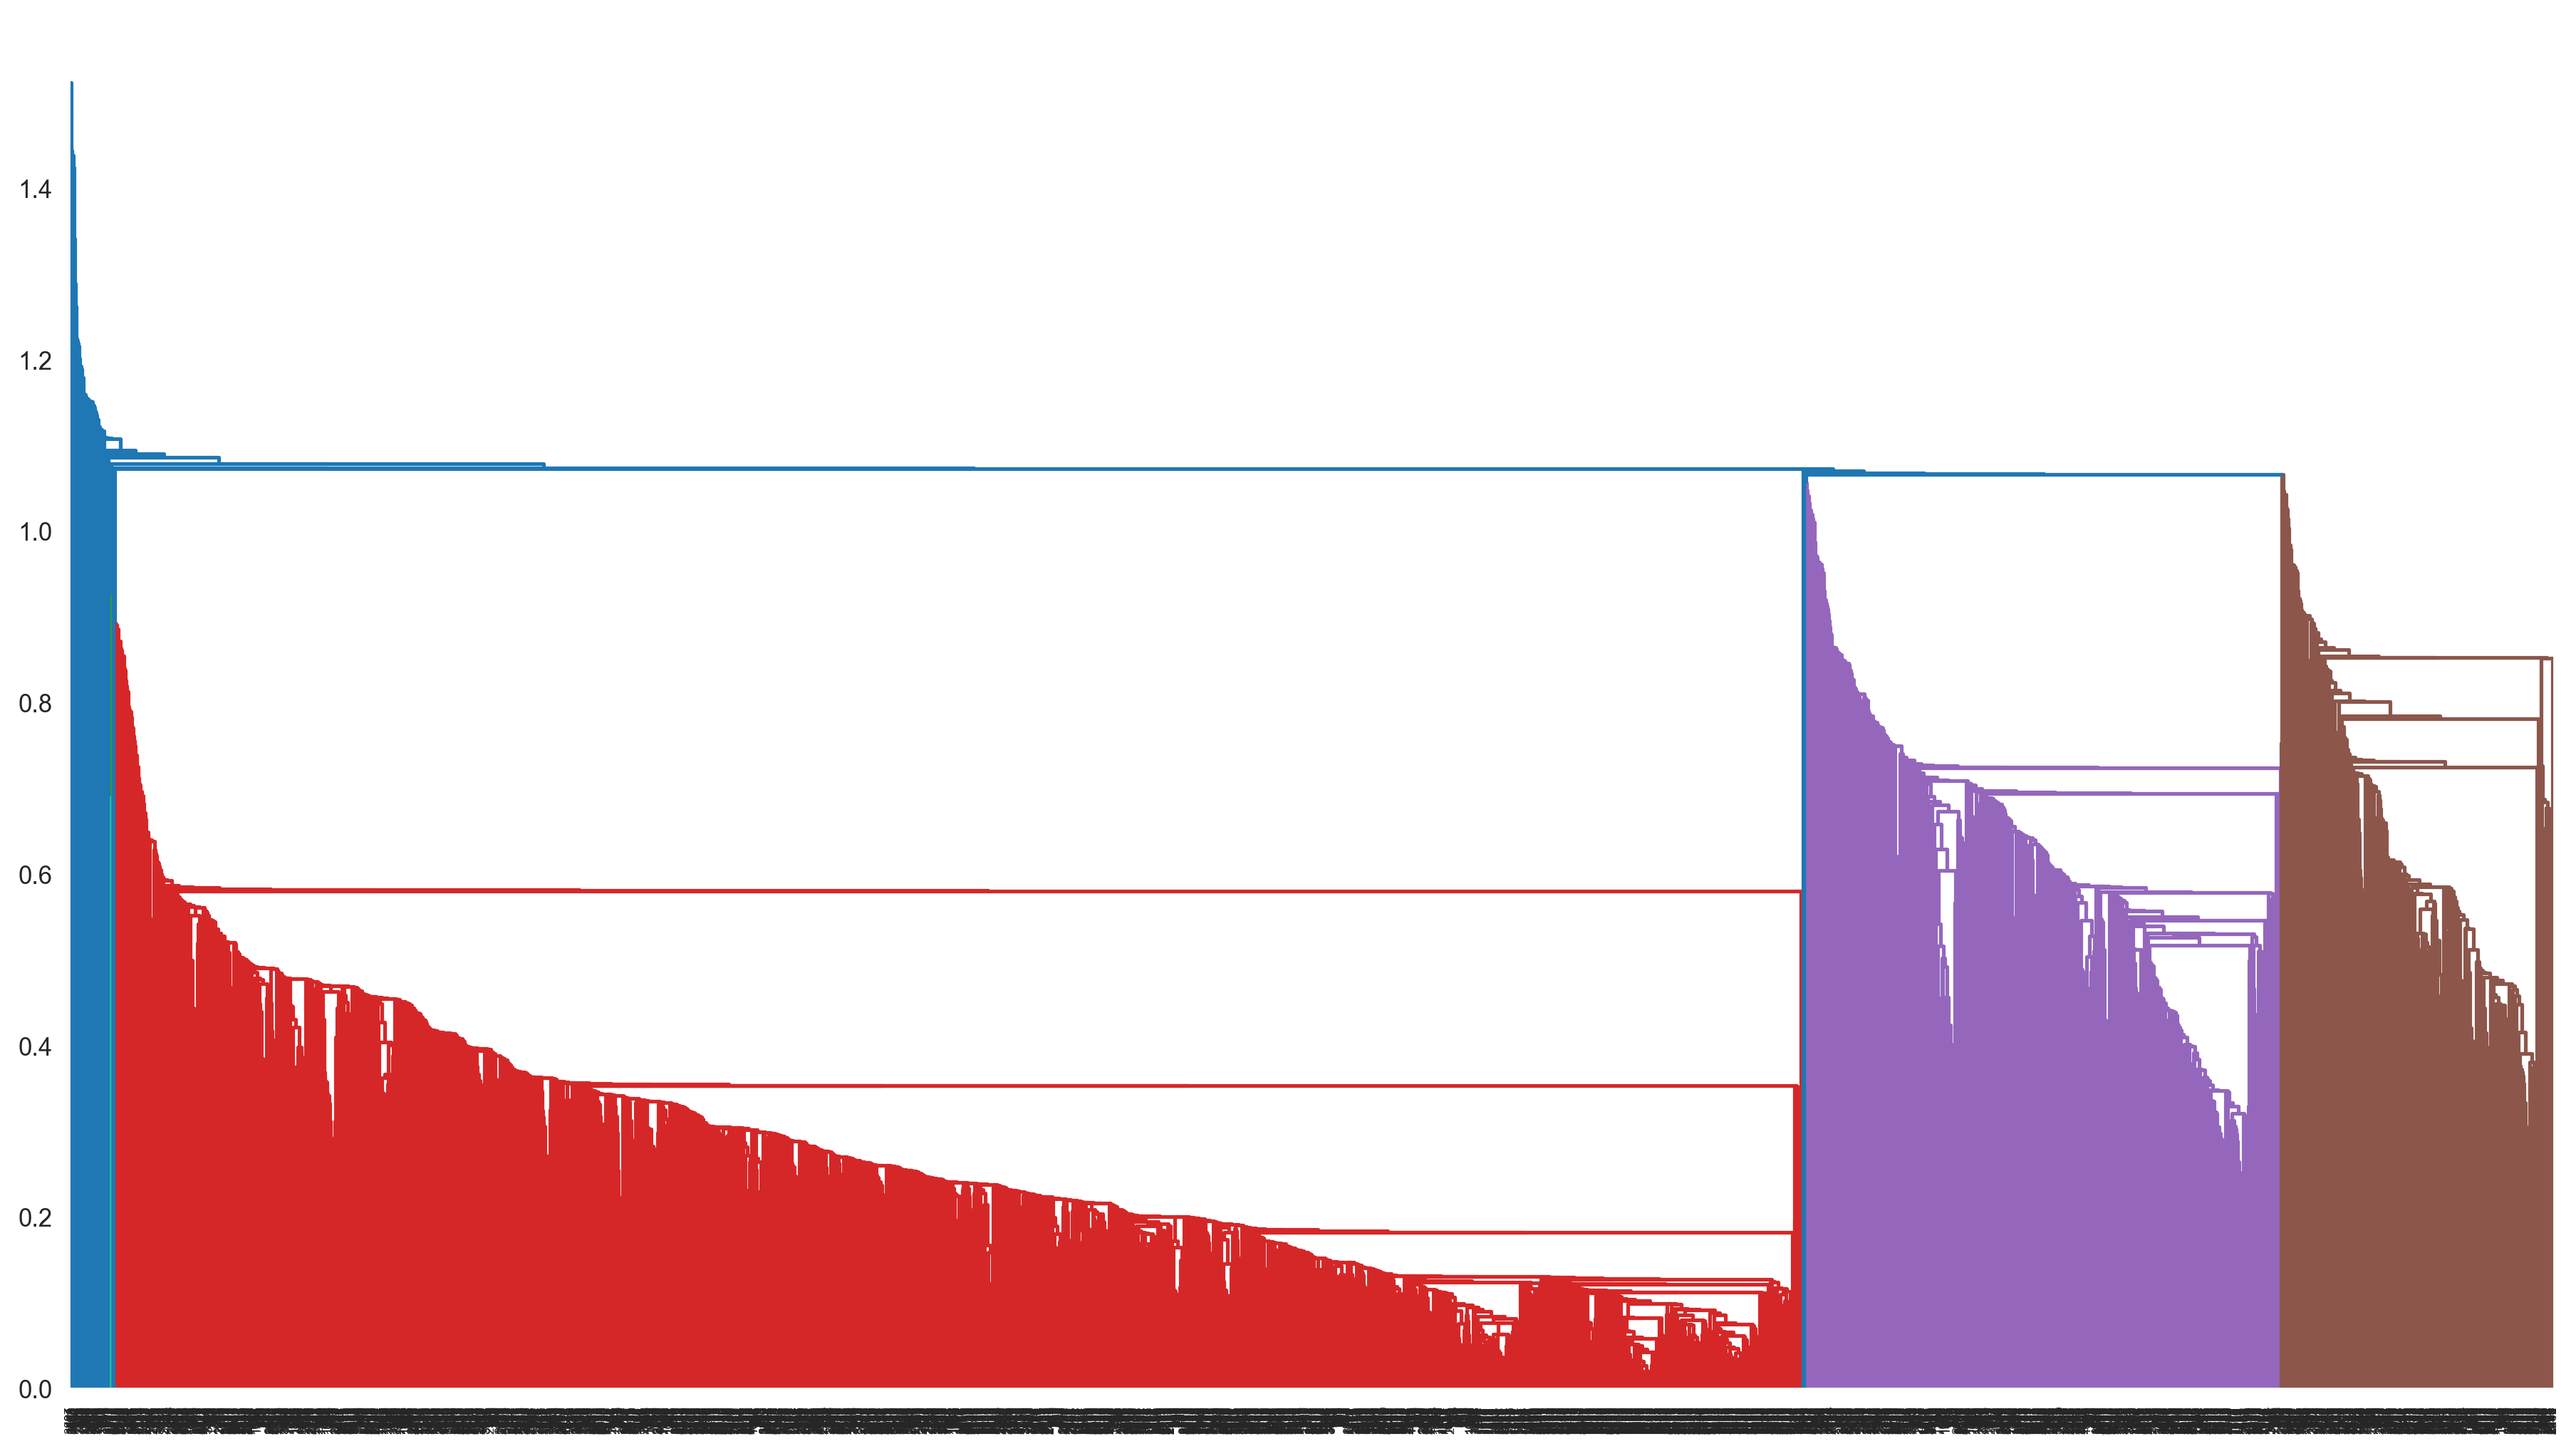

In [27]:
lk_single = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk_single)

#### single linkage is not giving me proper results. It is not able to display the dendrogram properly,there is a huge overlapping between the clusters

### COMPLETE LINKAGE

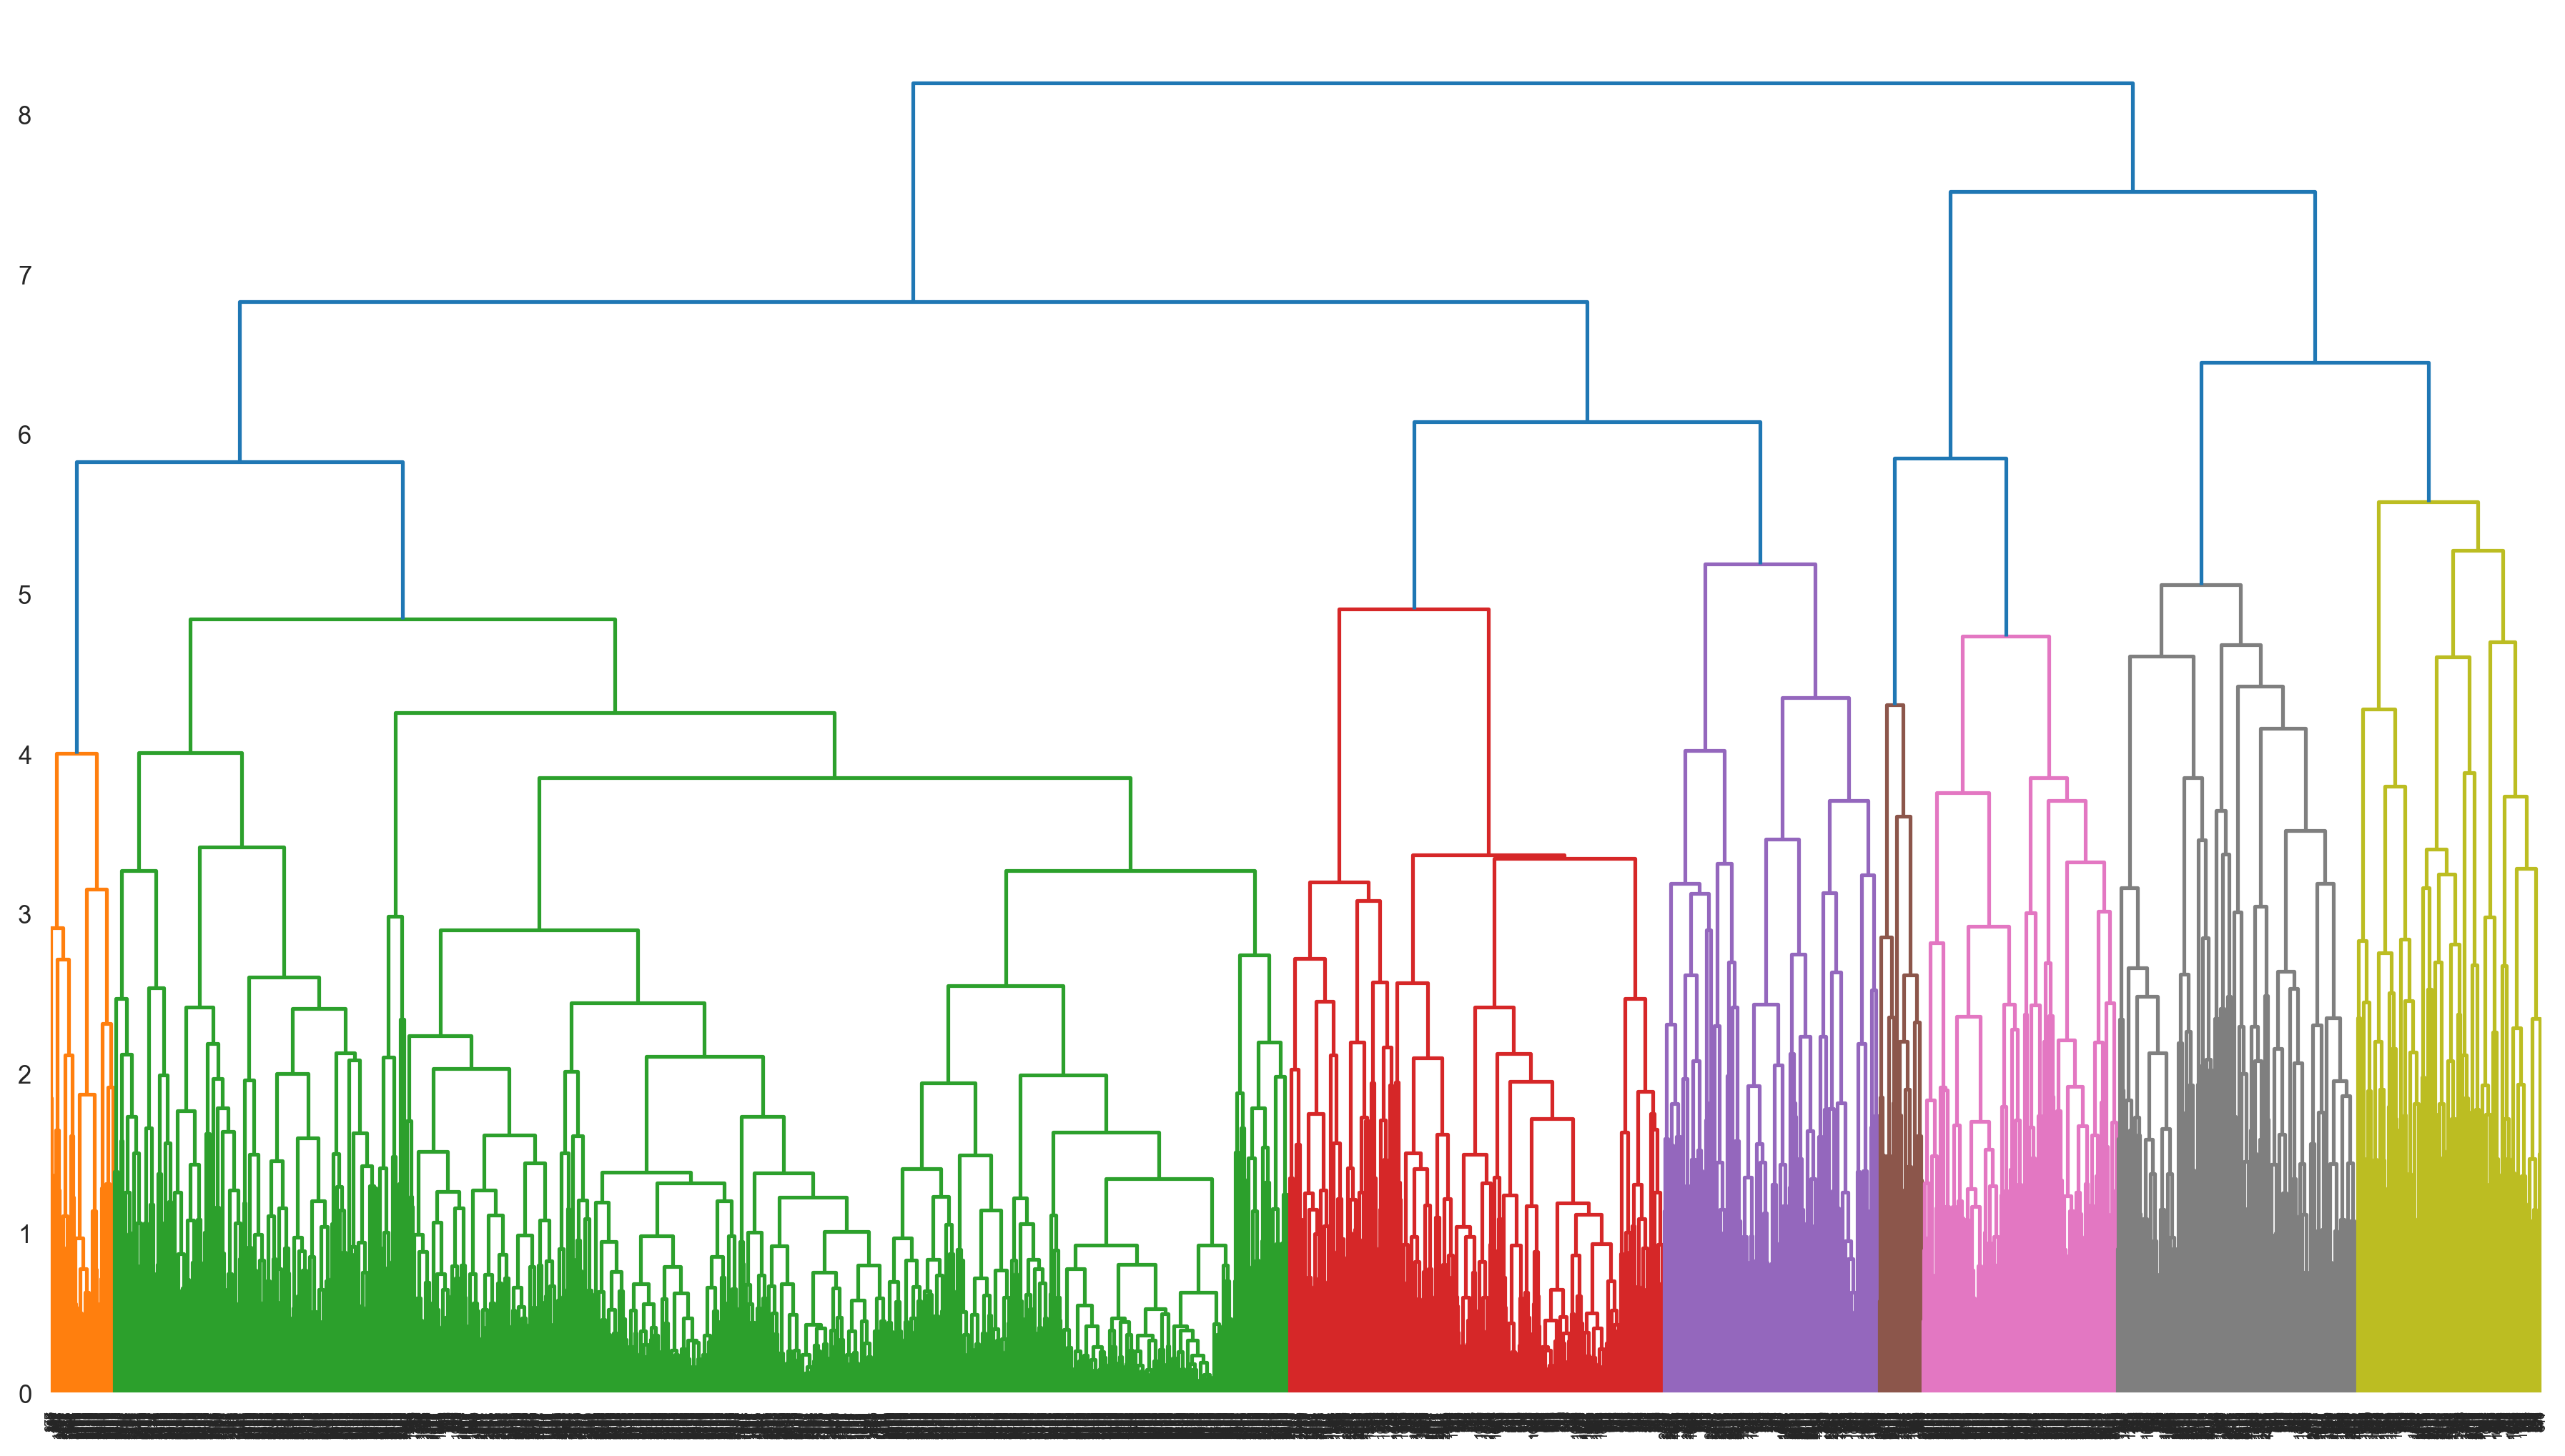

In [28]:
lk_complete = hierarchy.linkage(x, method='complete')
dendro_gram = hierarchy.dendrogram(lk_complete)

# MODEL BUILDING

In [ ]:
# In dendrogram I can see that Only two hetrogeneous type of clusters are there so I chose to create 2 clusters

In [33]:
model = AgglomerativeClustering(n_clusters=2)
ypred = model.fit_predict(x)
ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

# Evaluation of model

In [34]:
silhouette_score(x, ypred)

0.32696794175061905

accuracy is not good because Hierarchical_clustering does not work very well when it comes to complicated structures of clusters, that's why in industry DBSCAN is preferred in comparision to this algorithm

In [36]:
np.unique(ypred)

array([0, 1], dtype=int64)

In [ ]:
# I can see that Two clusters have been created and algorithm has labelled them as 0 and 1

In [37]:
df['clusters'] = ypred
ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

# ANALYSIS

In [40]:
df.groupby('clusters').agg('mean')

Balance  Qual_miles   Bonus_miles  Bonus_trans  \
clusters                                                        
0         56334.402041         0.0  14292.865318    10.234822   
1         82644.302120         0.0  18260.887920    14.609541   

          Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
clusters                                                         
0                 15.508287         0.055304        4068.190858  
1                592.892226         1.949647        4248.310071

in the 1st group (cluster label 0) people are having lesser amount of Balance, Bonus_miles, Flight_miles_12mo, Days_since_enroll in comparision to the 2nd grop(cluster label 0) where peole are having high higher values for these things